In [1]:
import os
from pathlib import Path
import numpy as np
import math
import random
import torch
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

import matplotlib.pyplot as plt

import config
import modules.dataset_fasdd as fasdd_ds
import modules.utils as utils

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.11 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


# Data Augmentation

In [2]:
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    # If boxes are to close, it can remove some because they fall inside same cell
    A.RandomSizedBBoxSafeCrop(height=int(1.4*config.IMG_H),
                              width= int(1.4*config.IMG_W),
                              erosion_rate=0.3,
                              p=0.3),
    A.OneOf([
        A.RandomBrightnessContrast(p=0.4),
        A.HueSaturationValue(hue_shift_limit=10, p=0.2),
        A.Blur(blur_limit=(3,3), p=0.3),
        A.CLAHE(clip_limit=2.0, p=0.3),
    ], p=0.9),
        # Shifting, scaling and rotation could dive 2 bbox inside same grid...
        #A.ShiftScaleRotate(rotate_limit=10, p=0.2),
    A.Resize(config.IMG_H, config.IMG_W, p=1),
    ToTensorV2(p=1),
], bbox_params=A.BboxParams(format='yolo', 
                            min_area=16*16, 
                            min_visibility=0.1, 
                            label_fields=['class_labels']))

# Dataset

In [3]:
ds = fasdd_ds.FASDDDataset(
    img_h = config.IMG_H, 
    img_w = config.IMG_H, 
    imgs_dir = config.FASDD_UAV_IMGS_DIR, 
    labels_dir = config.FASDD_UAV_LABELS_DIR,  
    file_labels_list = config.FASDD_UAV_TEST_LABELS_FILE,
    S = config.S, 
    C = config.C, 
    max_obj = config.MAX_OBJ,
    ds_len = config.DS_LEN,
    transform=train_transform, 
    target_transform=None)

DFire Removed wrong images: 0
DFire Removed due to overlapping: 35
DFire Removed due to more than 4: 731


In [4]:
print(len(ds))

3415


In [5]:
img, label = ds.__getitem__(6)

In [6]:
print(img.shape)

torch.Size([3, 224, 224])


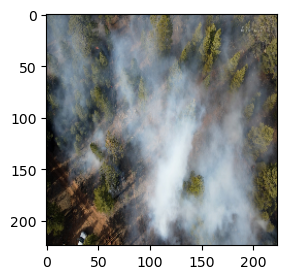

In [7]:
fig, ax = plt.subplots(figsize=(3,3))

ax.imshow(img.permute(1, 2, 0))
plt.show()

In [8]:
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
pic = utils.plot_dataset_img(img, label, grid=True)

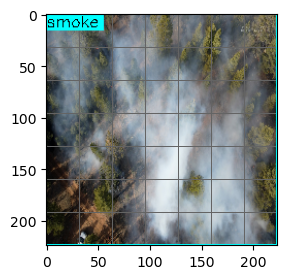

In [10]:
fig, ax = plt.subplots(figsize=(3,3))

ax.imshow(pic)
plt.show()